In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from karateclub.dataset import GraphSetReader
from karateclub import FeatherGraph
from sklearn.model_selection import train_test_split
import networkx as nx

import itertools

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

import praw
from praw.models import MoreComments

from utils.utils import *

ModuleNotFoundError: No module named 'utils'

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
reader = GraphSetReader("reddit10k")

graphs = reader.get_graphs()
y = reader.get_target()

In [36]:
model = FeatherGraph()
model.fit(graphs)
X = model.get_embedding()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
downstream_model = LogisticRegression(max_iter=500, random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

AUC: 0.8171


In [3]:
client_id = '8Ara-tL3whPJTKSzuLe0Wg'
client_secret = '5ciIZ_875ywNSWHWY7S4QcaimF788g'
user_agent = '<console:IC_proiect:1.0>'

reddit = praw.Reddit(client_id = client_id,
                    client_secret = client_secret,
                    user_agent = user_agent)

In [6]:
post_url = "https://www.reddit.com/r/hardware/comments/u7lugl/lithium_costs_a_lot_of_moneyso_why_arent_we/"
submission = reddit.submission(url = post_url)

In [13]:
G = nx.Graph()

nodes, edges = get_graph_indices_from_submission(submission)

G.add_edges_from(edges)
G.add_nodes_from(nodes)


print(G.number_of_nodes())

172


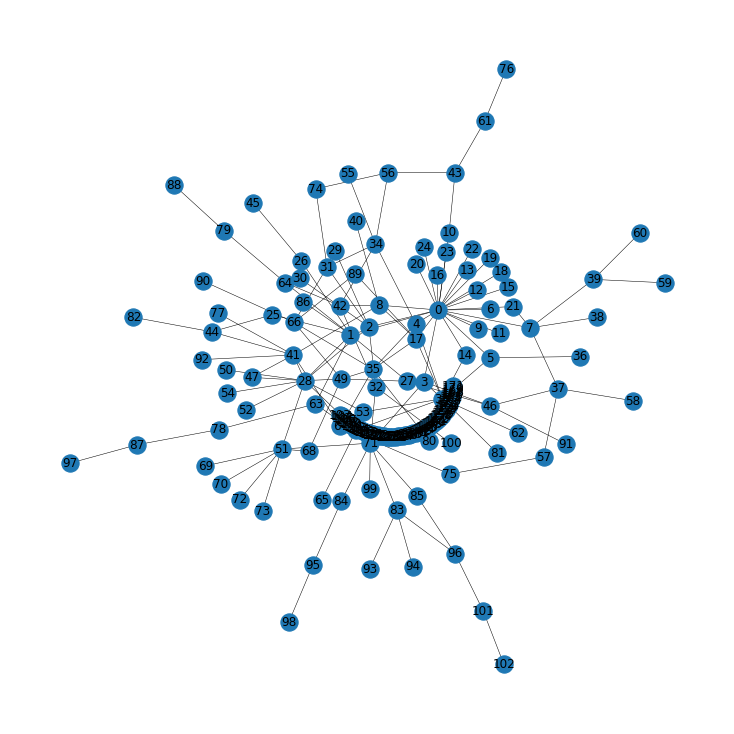

In [14]:
plt.figure(figsize = (10, 10))
nx.draw_kamada_kawai(G, with_labels=True, width = .5)

In [113]:
model = FeatherGraph()

model.fit([G])
X_graph = model.get_embedding()

In [114]:
y_predict = downstream_model.predict_proba(X_graph)

print(y_predict)

[[0.77667168 0.22332832]]


In [9]:
graph_nodes, graph_edges = get_graph_names_from_submission(submission)
G = nx.Graph()
G.add_edges_from(graph_edges)
G.add_nodes_from(graph_nodes)

print(G.number_of_nodes())

103


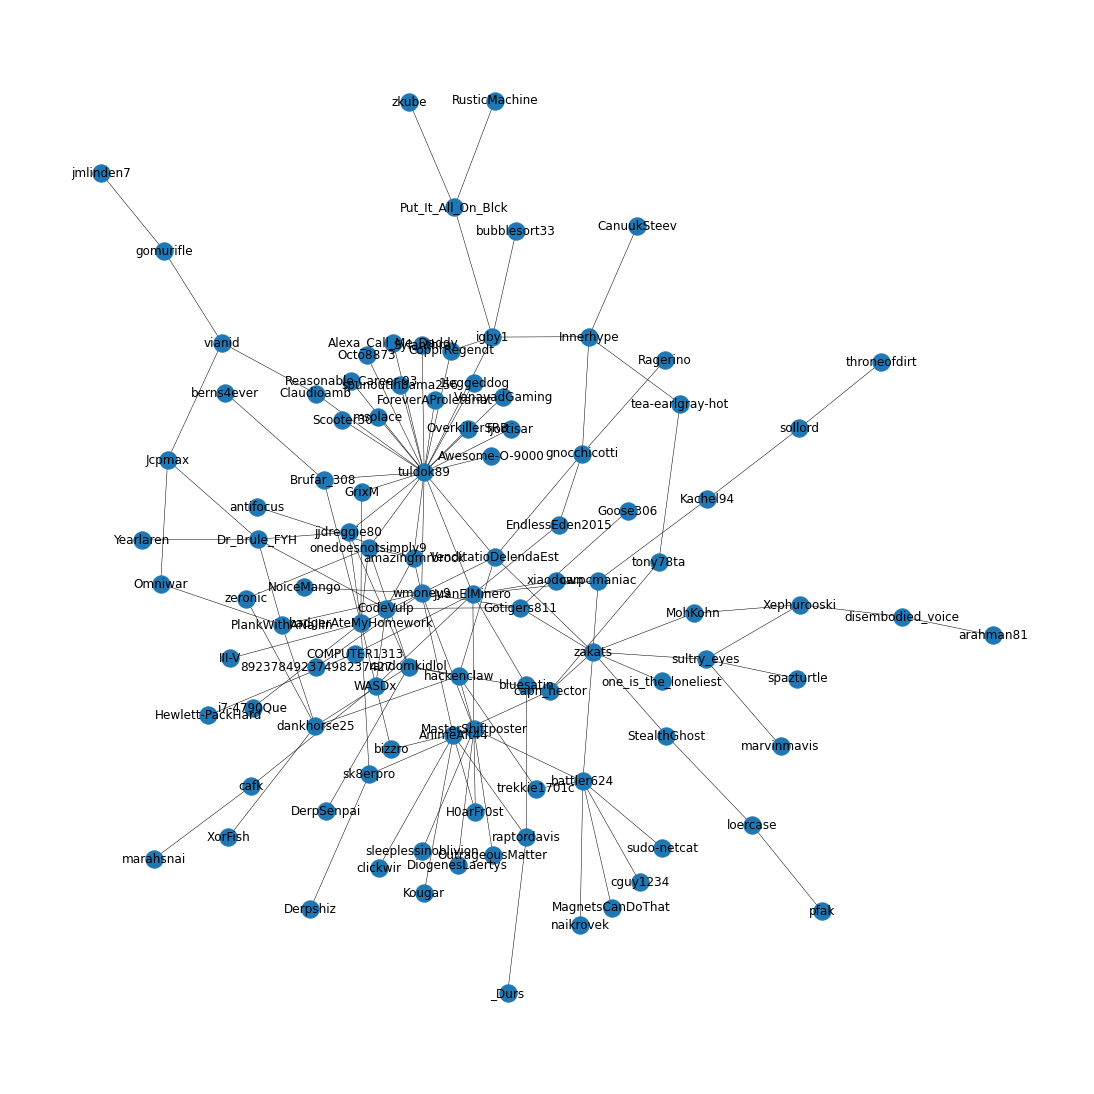

In [10]:
plt.figure(figsize = (15, 15))
nx.draw_kamada_kawai(G, with_labels=True, width = .5)

107


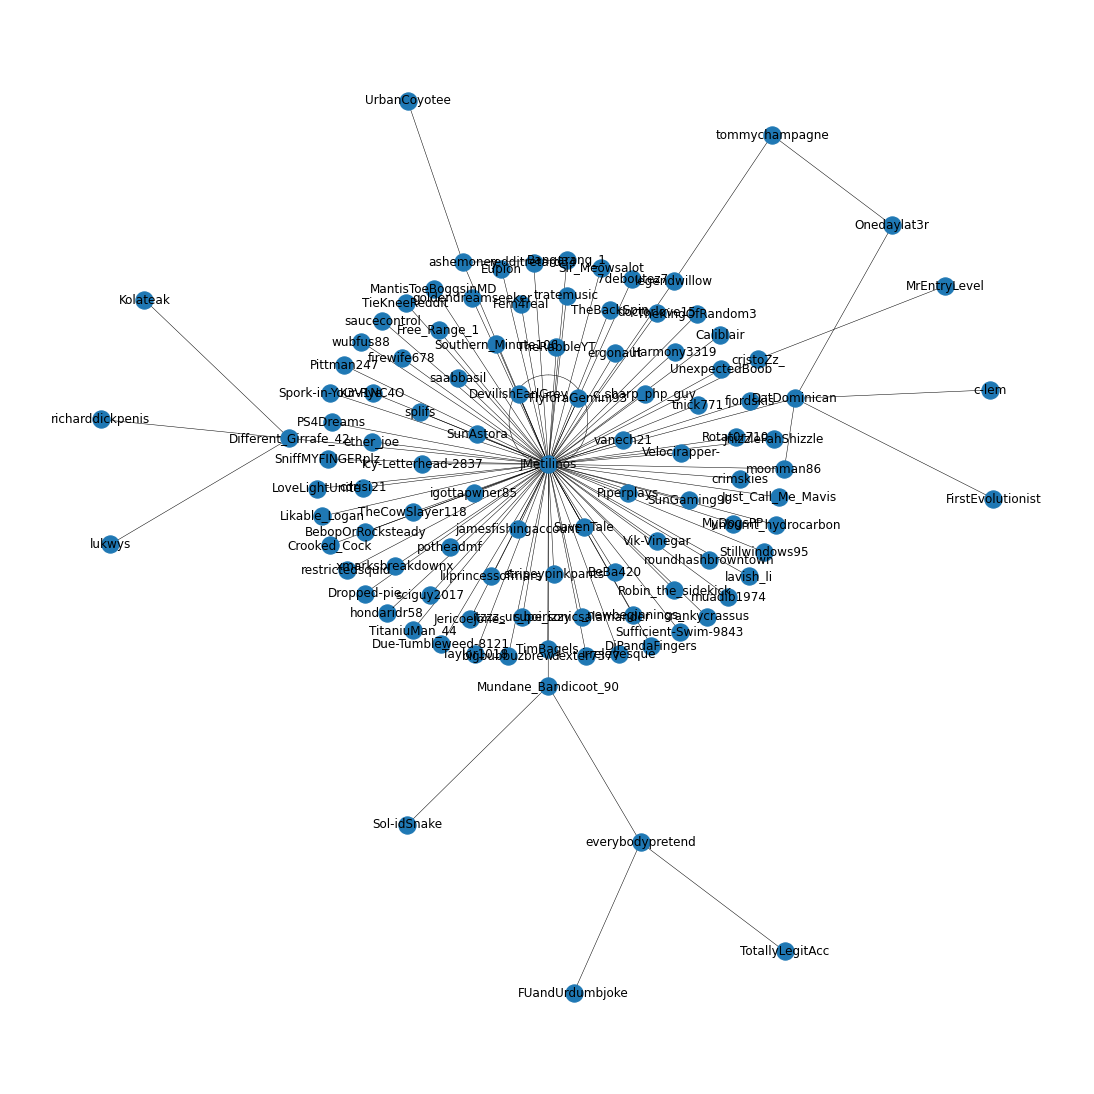

In [17]:
post_url = "https://www.reddit.com/r/food/comments/usew6y/homemade_peanut_butter_jelly_cookies/"
submission = reddit.submission(url = post_url)

graph_nodes, graph_edges = get_graph_names_from_submission(submission)
G = nx.Graph()
G.add_edges_from(graph_edges)
G.add_nodes_from(graph_nodes)

print(G.number_of_nodes())

plt.figure(figsize = (15, 15))
nx.draw_kamada_kawai(G, with_labels=True, width = .5)